In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('avito.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head(5)

/home/Albert/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка
0,Audi,A8,2010,седан,990 000,4.2,чёрный,полный,левый,бензин,не битый,1,4.0,340 л.с.,160000 км,WAUZZZ4H*BN****23,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
1,Audi,A8,2007,седан,1 250 000,6.0,серый,полный,левый,бензин,не битый,1,4.0,450 л.с.,41075 км,WAUZZZ4E*7N****87,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
2,Audi,Q5,2009,универсал,660 000,2.0,серый,полный,левый,бензин,не битый,2,5.0,211 л.с.,157000 км,WAUZZZ8R*AA****95,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
3,Audi,Q5,2009,внедорожник,769 999,2.0,белый,полный,левый,бензин,не битый,2,NaN,211 л.с.,81000 км,WAUZZZ8R*AA****51,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
4,Audi,Q7,2007,внедорожник,770 000,3.6,чёрный,полный,левый,бензин,не битый,2,5.0,280 л.с.,175000 км,WAUZZZ4L*8D****67,автомат,https://www.avito.ru/moskva/avtomobili/audi_q7...


In [38]:
data['Руль'][data['Марка'] == 'Toyota'].value_counts()

левый     2457
правый     230
Name: Руль, dtype: int64

In [41]:
data[(data['Руль'] == 'правый') & (data['Марка'] == 'Toyota')]['Год выпуска'].value_counts()

2002    28
2015    26
2000    21
2001    21
2005    17
2003    17
2014    15
2013    15
2012    14
2004    13
2006    12
2007     9
2008     7
2009     7
2010     4
2011     2
2016     1
2018     1
Name: Год выпуска, dtype: int64

In [35]:
data['Марка'][data['Руль'] == 'правый'].value_counts()

Toyota           230
Nissan           158
Honda             79
Subaru            38
Mitsubishi        33
Mazda             24
Suzuki            17
Audi              14
Opel              10
ВАЗ (LADA)         9
Hyundai            8
BMW                8
Mercedes-Benz      7
Lexus              5
Peugeot            4
Land Rover         4
Renault            4
Volkswagen         4
SsangYong          3
ГАЗ                3
Citroen            2
Skoda              2
Porsche            1
KIA                1
Volvo              1
Chevrolet          1
Name: Марка, dtype: int64

#### Преобразовываю данные в флоат

In [23]:
data['Цена'] = [float(x.replace(' ', '')) for x in data['Цена']]
data['Объём двигателя'] = pd.to_numeric(data['Объём двигателя'], errors='coerce')
data['Владельцев по ПТС'] = pd.to_numeric(data['Владельцев по ПТС'], errors='coerce')
data['Мощность двигателя'] = [float(x.split('л')[0]) for x in data['Мощность двигателя']]
data['Пробег'] = [str(x) for x in data['Пробег']]
data['Пробег'] = [float(x.replace('км', '')) for x in data['Пробег']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41104 entries, 0 to 41103
Data columns (total 18 columns):
Марка                   41104 non-null object
Модель                  41104 non-null object
Год выпуска             41104 non-null int64
Тип кузова              41104 non-null object
Цена                    41104 non-null float64
Объём двигателя         41016 non-null float64
Цвет                    41104 non-null object
Привод                  41104 non-null object
Руль                    41104 non-null object
Тип двигателя           41104 non-null object
Состояние               34397 non-null object
Владельцев по ПТС       31247 non-null float64
Количество дверей       30300 non-null float64
Мощность двигателя      41104 non-null float64
Пробег                  34397 non-null float64
VIN или номер кузова    41104 non-null object
Коробка передач         41104 non-null object
Ссылка                  41104 non-null object
dtypes: float64(6), int64(1), object(11)
memory usage: 5.6

#### удалил лимузины

In [24]:
data_new = pd.read_csv('avito_wo_nan.csv')
data_new = data_new.drop(['Unnamed: 0'], axis=1)
data_new.head(5)

,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка
0,Audi,A8,2010,седан,990000.0,4.2,чёрный,полный,левый,бензин,не битый,1.0,340.0,160000.0,WAUZZZ4H*BN****23,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
1,Audi,A8,2007,седан,1250000.0,6.0,серый,полный,левый,бензин,не битый,1.0,450.0,41075.0,WAUZZZ4E*7N****87,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
2,Audi,Q5,2009,универсал,660000.0,2.0,серый,полный,левый,бензин,не битый,2.0,211.0,157000.0,WAUZZZ8R*AA****95,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
3,Audi,Q5,2009,внедорожник,769999.0,2.0,белый,полный,левый,бензин,не битый,2.0,211.0,81000.0,WAUZZZ8R*AA****51,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
4,Audi,Q7,2007,внедорожник,770000.0,3.6,чёрный,полный,левый,бензин,не битый,2.0,280.0,175000.0,WAUZZZ4L*8D****67,автомат,https://www.avito.ru/moskva/avtomobili/audi_q7...


In [26]:
data_new = data_new.loc[data_new['Тип кузова'] != 'лимузин']

In [7]:
data_new_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41083 entries, 0 to 41103
Data columns (total 17 columns):
Марка                   41083 non-null object
Модель                  41083 non-null object
Год выпуска             41083 non-null int64
Тип кузова              41083 non-null object
Цена                    41083 non-null float64
Объём двигателя         41083 non-null float64
Цвет                    41083 non-null object
Привод                  41083 non-null object
Руль                    41083 non-null object
Тип двигателя           41083 non-null object
Состояние               41083 non-null object
Владельцев по ПТС       41083 non-null float64
Мощность двигателя      41083 non-null float64
Пробег                  41083 non-null float64
VIN или номер кузова    41083 non-null object
Коробка передач         41083 non-null object
Ссылка                  41083 non-null object
dtypes: float64(5), int64(1), object(11)
memory usage: 5.6+ MB


In [16]:
data = data_new_w
data = data.loc[data['Пробег'] <= 300000]
data_new = data

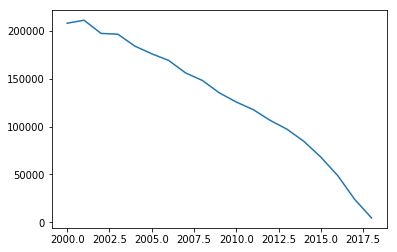

In [5]:
df_kms = data.groupby(by='Год выпуска')['Пробег'].mean()
# plt.plot(data['Пробег'], data['Год выпуска'])
plt.plot(df_kms)

Ебану бейслайн

In [6]:
data_new = data.dropna()
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22297 entries, 0 to 41103
Data columns (total 18 columns):
Марка                   22297 non-null object
Модель                  22297 non-null object
Год выпуска             22297 non-null int64
Тип кузова              22297 non-null object
Цена                    22297 non-null float64
Объём двигателя         22297 non-null float64
Цвет                    22297 non-null object
Привод                  22297 non-null object
Руль                    22297 non-null object
Тип двигателя           22297 non-null object
Состояние               22297 non-null object
Владельцев по ПТС       22297 non-null float64
Количество дверей       22297 non-null float64
Мощность двигателя      22297 non-null float64
Пробег                  22297 non-null float64
VIN или номер кузова    22297 non-null object
Коробка передач         22297 non-null object
Ссылка                  22297 non-null object
dtypes: float64(6), int64(1), object(11)
memory usage: 3.2

In [33]:
prices = data_new['Цена'].value_counts()

In [40]:
data_new[data_new['Цена'] >= 8000000]

,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Мощность двигателя,Пробег,Коробка передач
21,Audi,A8,2018,седан,8191000.0,3.000000,чёрный,полный,левый,бензин,не битый,0.0,340.0,0.0,автомат
1418,Audi,A8,2018,седан,8542000.0,3.000000,чёрный,полный,левый,бензин,не битый,0.0,340.0,0.0,автомат
1423,Audi,A8,2018,седан,8508000.0,3.000000,серый,полный,левый,бензин,не битый,0.0,340.0,0.0,автомат
1871,Audi,RS7,2016,хетчбэк,8726580.0,4.000000,синий,полный,левый,бензин,не битый,0.0,605.0,0.0,автомат
1906,Audi,A8,2018,седан,8206000.0,3.000000,синий,полный,левый,бензин,не битый,0.0,340.0,0.0,автомат
2012,Audi,RS6,2017,универсал,9645317.0,4.000000,серый,полный,левый,бензин,не битый,0.0,605.0,0.0,автомат
2173,BMW,7 серия,2017,седан,8610000.0,4.400000,чёрный,полный,левый,бензин,не битый,0.0,450.0,0.0,автомат
2176,BMW,X6 M,2017,внедорожник,8803790.0,4.400000,голубой,полный,левый,бензин,не битый,0.0,575.0,0.0,автомат
2181,BMW,7 серия,2017,седан,9883980.0,4.400000,чёрный,полный,левый,бензин,не битый,0.0,450.0,0.0,автомат
2456,BMW,7 серия,2017,седан,8370000.0,3.000000,синий,полный,левый,бензин,не битый,0.0,326.0,0.0,автомат


In [46]:
Probeg = data['Пробег'].values
data['Супер пробег'] = np.log(1 / (Probeg + 1))
# Probeg

/home/Albert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


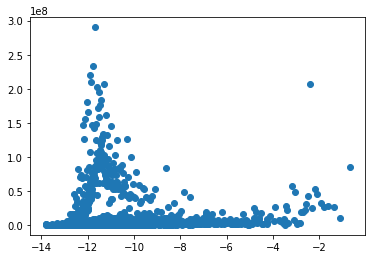

In [56]:
Sup_probe = data.groupby(by='Супер пробег')['Цена'].sum().sort_index()
plt.scatter(Sup_probe.index, Sup_probe)

In [65]:
data.loc[13]['Состояние']

' битый'

In [63]:
data[data['Состояние'] != 'не битая']

,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка,Супер пробег
0,Audi,A8,2010,седан,990000.0,4.2,чёрный,полный,левый,бензин,не битый,1.0,4.0,340.0,160000.0,WAUZZZ4H*BN****23,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...,-11.982935
1,Audi,A8,2007,седан,1250000.0,6.0,серый,полный,левый,бензин,не битый,1.0,4.0,450.0,41075.0,WAUZZZ4E*7N****87,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...,-10.623179
2,Audi,Q5,2009,универсал,660000.0,2.0,серый,полный,левый,бензин,не битый,2.0,5.0,211.0,157000.0,WAUZZZ8R*AA****95,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...,-11.964007
3,Audi,Q5,2009,внедорожник,769999.0,2.0,белый,полный,левый,бензин,не битый,2.0,NaN,211.0,81000.0,WAUZZZ8R*AA****51,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...,-11.302217
4,Audi,Q7,2007,внедорожник,770000.0,3.6,чёрный,полный,левый,бензин,не битый,2.0,5.0,280.0,175000.0,WAUZZZ4L*8D****67,автомат,https://www.avito.ru/moskva/avtomobili/audi_q7...,-12.072547
5,Audi,Q3,2011,хетчбэк,820000.0,2.0,чёрный,полный,левый,бензин,не битый,2.0,5.0,211.0,98000.0,WAUZZZ8U*CR****48,автомат,https://www.avito.ru/moskva/avtomobili/audi_q3...,-11.492733
6,Audi,A3,2005,хетчбэк,400000.0,2.0,красный,передний,левый,бензин,не битый,NaN,3.0,150.0,213000.0,WAUZZZ8P*6A****35,автомат,https://www.avito.ru/moskva/avtomobili/audi_a3...,-12.269052
7,Audi,Q5,2010,внедорожник,800000.0,2.0,белый,полный,левый,бензин,не битый,3.0,5.0,211.0,130000.0,XW8ZZZ8R*AG****63,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...,-11.775297
8,Audi,TT,2000,купе,425000.0,1.8,белый,полный,левый,бензин,не битый,NaN,3.0,180.0,195000.0,TRUZZZ8N*Y1****26,механика,https://www.avito.ru/moskva/avtomobili/audi_tt...,-12.180760
9,Audi,Q7,2007,внедорожник,610000.0,4.2,серый,полный,левый,бензин,не битый,3.0,5.0,350.0,120450.0,WAUZZZ4L*7D****82,автомат,https://www.avito.ru/moskva/avtomobili/audi_q7...,-11.698998


In [57]:
prices = data['Цена'].value_counts().sort_index
prices

650000.0      360
450000.0      340
350000.0      338
550000.0      330
750000.0      313
600000.0      267
400000.0      260
700000.0      250
500000.0      243
850000.0      237
250000.0      236
420000.0      231
300000.0      228
1100000.0     208
950000.0      208
480000.0      206
800000.0      204
470000.0      204
380000.0      199
330000.0      197
580000.0      191
900000.0      185
530000.0      182
520000.0      182
200000.0      177
1200000.0     175
430000.0      175
320000.0      173
370000.0      173
1050000.0     171
             ... 
2246507.0       1
10036841.0      1
2247000.0       1
4804000.0       1
7115320.0       1
1909900.0       1
5018000.0       1
7592000.0       1
2114000.0       1
954900.0        1
226000.0        1
6590600.0       1
5542000.0       1
4167030.0       1
6065828.0       1
3555768.0       1
3294800.0       1
5540872.0       1
3819000.0       1
188750.0        1
1123000.0       1
6589063.0       1
1254000.0       1
4490933.0       1
1647000.0 

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41104 entries, 0 to 41103
Data columns (total 19 columns):
Марка                   41104 non-null object
Модель                  41104 non-null object
Год выпуска             41104 non-null int64
Тип кузова              41104 non-null object
Цена                    41104 non-null float64
Объём двигателя         41016 non-null float64
Цвет                    41104 non-null object
Привод                  41104 non-null object
Руль                    41104 non-null object
Тип двигателя           41104 non-null object
Состояние               34397 non-null object
Владельцев по ПТС       31247 non-null float64
Количество дверей       30300 non-null float64
Мощность двигателя      41104 non-null float64
Пробег                  34397 non-null float64
VIN или номер кузова    41104 non-null object
Коробка передач         41104 non-null object
Ссылка                  41104 non-null object
Супер пробег            34397 non-null float64
dtypes: flo

In [47]:
data.head()

,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка,Супер пробег
0,Audi,A8,2010,седан,990000.0,4.2,чёрный,полный,левый,бензин,не битый,1.0,4.0,340.0,160000.0,WAUZZZ4H*BN****23,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...,-11.982935
1,Audi,A8,2007,седан,1250000.0,6.0,серый,полный,левый,бензин,не битый,1.0,4.0,450.0,41075.0,WAUZZZ4E*7N****87,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...,-10.623179
2,Audi,Q5,2009,универсал,660000.0,2.0,серый,полный,левый,бензин,не битый,2.0,5.0,211.0,157000.0,WAUZZZ8R*AA****95,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...,-11.964007
3,Audi,Q5,2009,внедорожник,769999.0,2.0,белый,полный,левый,бензин,не битый,2.0,NaN,211.0,81000.0,WAUZZZ8R*AA****51,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...,-11.302217
4,Audi,Q7,2007,внедорожник,770000.0,3.6,чёрный,полный,левый,бензин,не битый,2.0,5.0,280.0,175000.0,WAUZZZ4L*8D****67,автомат,https://www.avito.ru/moskva/avtomobili/audi_q7...,-12.072547


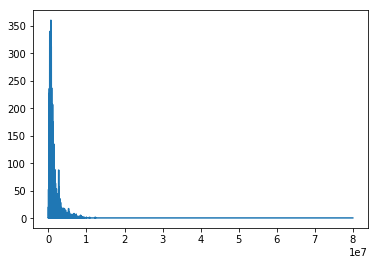

In [36]:
plt.plot(prices.sort_index())

In [43]:
data_new[data_new['Цена'] == 65000000]

,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Мощность двигателя,Пробег,Коробка передач
18298,Mercedes-Benz,G-класс,2018,внедорожник,65000000.0,4.0,серый,полный,левый,бензин,не битый,0.0,422.0,0.0,автомат


In [38]:
prices.sort_index()

1000.0         1
5000.0         1
6000.0         1
12000.0        1
13000.0        1
15000.0        2
17000.0        4
18000.0        4
19000.0        1
19999.0        1
20000.0       10
22000.0        2
23000.0        1
25000.0       14
26000.0        2
27000.0        4
28000.0        3
29000.0        1
30000.0       21
31000.0        1
32000.0        9
33000.0        9
34000.0        1
35000.0       40
35788.0        1
36000.0        4
36500.0        1
36999.0        1
37000.0       10
38000.0        3
              ..
13187288.0     1
13399667.0     1
13444732.0     1
13499000.0     1
13661142.0     1
13671454.0     1
13726939.0     1
13750673.0     1
13775320.0     1
13935728.0     1
13968661.0     1
14013359.0     1
14100000.0     1
14402512.0     1
14440000.0     1
14500000.0     1
14608560.0     1
14900000.0     1
14987526.0     1
15899999.0     1
16100000.0     1
16101335.0     1
16990000.0     1
17500900.0     1
20990000.0     1
21500000.0     1
25000000.0     1
26700000.0    

In [7]:
data_new.head(5)

,Марка,Модель,Год выпуска,Тип кузова,Цена,Объём двигателя,Цвет,Привод,Руль,Тип двигателя,Состояние,Владельцев по ПТС,Количество дверей,Мощность двигателя,Пробег,VIN или номер кузова,Коробка передач,Ссылка
0,Audi,A8,2010,седан,990000.0,4.2,чёрный,полный,левый,бензин,не битый,1.0,4.0,340.0,160000.0,WAUZZZ4H*BN****23,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
1,Audi,A8,2007,седан,1250000.0,6.0,серый,полный,левый,бензин,не битый,1.0,4.0,450.0,41075.0,WAUZZZ4E*7N****87,автомат,https://www.avito.ru/moskva/avtomobili/audi_a8...
2,Audi,Q5,2009,универсал,660000.0,2.0,серый,полный,левый,бензин,не битый,2.0,5.0,211.0,157000.0,WAUZZZ8R*AA****95,автомат,https://www.avito.ru/moskva/avtomobili/audi_q5...
4,Audi,Q7,2007,внедорожник,770000.0,3.6,чёрный,полный,левый,бензин,не битый,2.0,5.0,280.0,175000.0,WAUZZZ4L*8D****67,автомат,https://www.avito.ru/moskva/avtomobili/audi_q7...
5,Audi,Q3,2011,хетчбэк,820000.0,2.0,чёрный,полный,левый,бензин,не битый,2.0,5.0,211.0,98000.0,WAUZZZ8U*CR****48,автомат,https://www.avito.ru/moskva/avtomobili/audi_q3...


In [27]:
data_new = data_new.drop(['VIN или номер кузова', 'Ссылка'], axis=1)

data_dummies = pd.get_dummies(data=data_new, columns=['Марка','Модель','Тип кузова','Цвет',
                                                      'Привод', 'Руль', 'Тип двигателя',
                                                      'Состояние', 'Коробка передач'])
data_dummies.head(5)

,Год выпуска,Цена,Объём двигателя,Владельцев по ПТС,Мощность двигателя,Пробег,Марка_Audi,Марка_BMW,Марка_Chevrolet,Марка_Citroen,...,Тип двигателя_газ,Тип двигателя_гибрид,Тип двигателя_дизель,Тип двигателя_электро,Состояние_ битый,Состояние_не битый,Коробка передач_автомат,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот
0,2010,990000.0,4.2,1.0,340.0,160000.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2007,1250000.0,6.0,1.0,450.0,41075.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,2009,660000.0,2.0,2.0,211.0,157000.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2009,769999.0,2.0,2.0,211.0,81000.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,2007,770000.0,3.6,2.0,280.0,175000.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [18]:
import numpy as np

In [28]:
X = data_dummies.drop(['Цена'], axis=1).values
y = data_dummies['Цена'].values

from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X) # fit does nothing.
transformer
Normalizer(copy=True, norm='l2')
transformer.transform(X)
X

array([[2.010e+03, 4.200e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.007e+03, 6.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.009e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.012e+03, 2.400e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.012e+03, 2.400e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.010e+03, 2.500e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=123)

In [32]:
%%time
from sklearn import linear_model
clf = linear_model.Ridge(alpha=100)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.5846411344579969
CPU times: user 12.2 s, sys: 511 ms, total: 12.7 s
Wall time: 3.39 s


In [19]:
np.logspace(0.01, 10000)

/usr/local/lib/python3.7/site-packages/numpy/core/function_base.py:233: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


array([1.02329299e+000, 1.23432229e+204,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf])

In [100]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.model_selection import GridSearchCV
alphas = np.linspace(0.1, 10000)
param_grid = {"alpha": alphas}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the n

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-01, 2.04180e+02, 4.08259e+02, 6.12339e+02, 8.16418e+02,
       1.02050e+03, 1.22458e+03, 1.42866e+03, 1.63274e+03, 1.83682e+03,
       2.04090e+03, 2.24498e+03, 2.44906e+03, 2.65313e+03, 2.85721e+03,
       3.06129e+03, 3.26537e+03, 3.46945e+03, 3.67353e+03, 3.87... 8.77552e+03, 8.97960e+03,
       9.18368e+03, 9.38776e+03, 9.59184e+03, 9.79592e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
grid.best_params_

{'alpha': 0.1}

In [18]:
grid.best_score_

0.6032015177856157

In [ ]:
from sklearn.